<a href="https://colab.research.google.com/github/Jaimemorillo/ShouldIwatchThisMovie/blob/master/final_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!cp /content/gdrive/MyDrive/methods.py .

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tqdm.notebook import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import seaborn as sns
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("notebook")

import methods as f

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [4]:
#params
maxlen=90
batch_size = 4
embedding_dim=64
lr=0.001
epochs=40

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


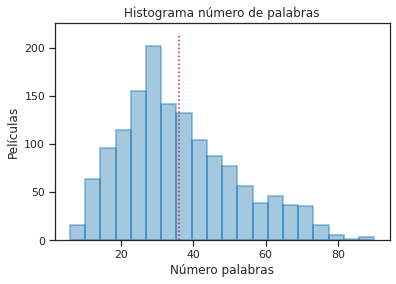

In [5]:
df = f.read_data("gdrive/My Drive/TFG/overviews_final.csv")
df['overview'] = df['overview'].progress_apply(lambda x: f.preprocessing(x))
X_train, X_test, y_train, y_test = f.split_train_test(df)
X_train, X_test, vocab_size, real_maxlen = f.tokenize(X_train, X_test, maxlen)

In [34]:
model = f.my_model(maxlen=maxlen, embedding_dim=embedding_dim, vocab_size=vocab_size, lr=lr, epochs=epochs)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 90)]              0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 90, 64)            630848    
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 90, 32)            6176      
_________________________________________________________________
batch_normalization_20 (Batc (None, 90, 32)            128       
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 45, 32)            0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 45, 32)            3104      
_________________________________________________________________
batch_normalization_21 (Batc (None, 45, 32)            128 

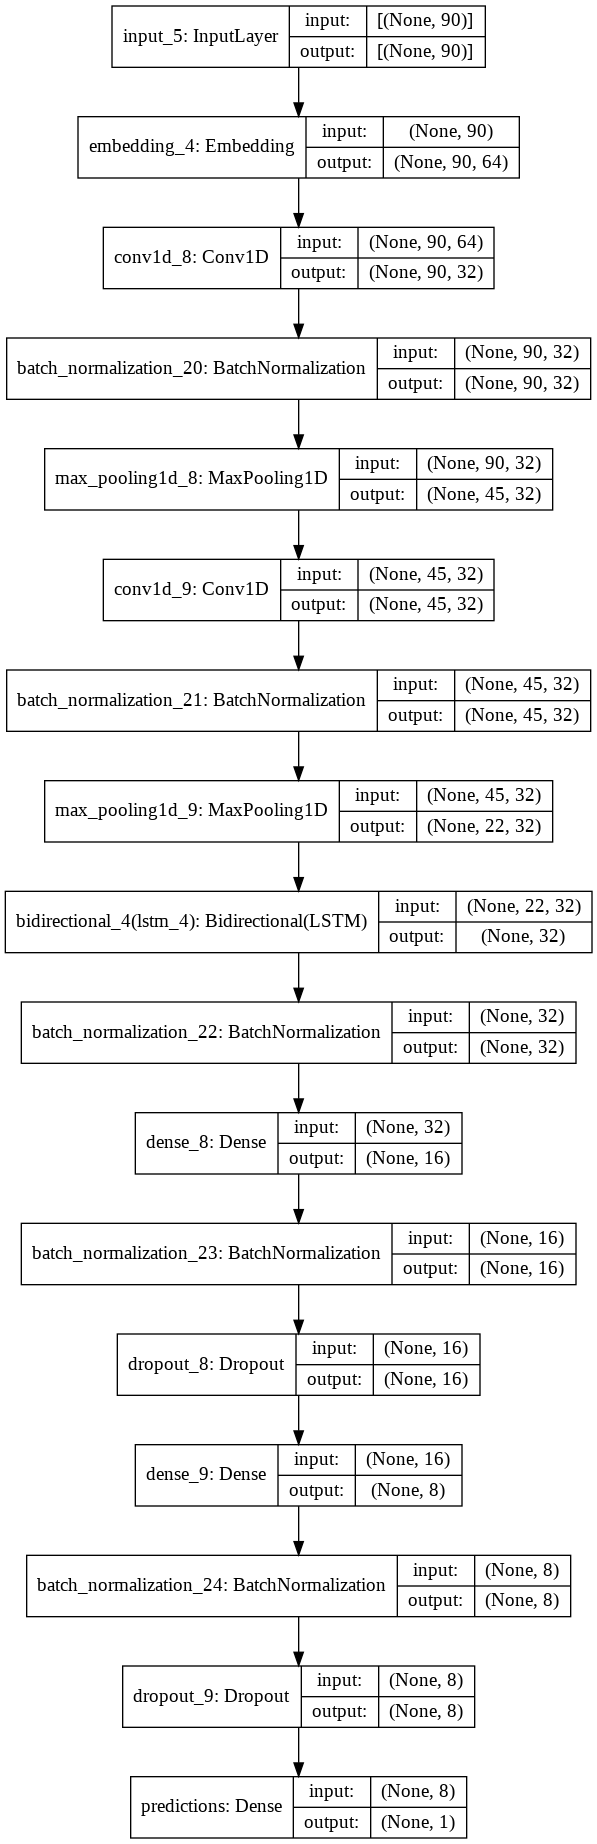

In [35]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [36]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, mode='min', restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=70,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=batch_size,
                    callbacks=[callback])

Epoch 1/70
358/358 [==============================] - 9s 17ms/step - loss: 1.0353 - accuracy: 0.5154 - val_loss: 0.7948 - val_accuracy: 0.4551
Epoch 2/70
358/358 [==============================] - 5s 15ms/step - loss: 0.8318 - accuracy: 0.5304 - val_loss: 0.6868 - val_accuracy: 0.5383
Epoch 3/70
358/358 [==============================] - 6s 16ms/step - loss: 0.7800 - accuracy: 0.4843 - val_loss: 0.7265 - val_accuracy: 0.4437
Epoch 4/70
358/358 [==============================] - 6s 16ms/step - loss: 0.7288 - accuracy: 0.5153 - val_loss: 0.6989 - val_accuracy: 0.4992
Epoch 5/70
358/358 [==============================] - 5s 15ms/step - loss: 0.7003 - accuracy: 0.5485 - val_loss: 0.6843 - val_accuracy: 0.5530
Epoch 6/70
358/358 [==============================] - 6s 16ms/step - loss: 0.7028 - accuracy: 0.5375 - val_loss: 0.6947 - val_accuracy: 0.5188
Epoch 7/70
358/358 [==============================] - 6s 16ms/step - loss: 0.6804 - accuracy: 0.5628 - val_loss: 0.6854 - val_accuracy: 0.5628

In [24]:
def plot_history(history, horizontal=0.35, vertical_train=0.05, vertical_val=0.06):
  fit_history = pd.DataFrame(history.history)
  fit_history['epoch'] = fit_history.index + 1
  fit_history = fit_history.round(2)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4.25))

  # Loss
  fit_history.plot(x='epoch', y=['loss', 'val_loss'], kind='line', ylabel='loss', title='Loss', marker='.', ax=ax1)

  # Acc
  fit_history.plot(x='epoch', y=['accuracy', 'val_accuracy'], kind='line', ylabel='acc', title='Accuracy', marker='.', ax=ax2)

  x = fit_history[fit_history['val_accuracy']==fit_history['val_accuracy'].max()]

  first_max_acc = fit_history[fit_history['val_accuracy']==fit_history['val_accuracy'].max()].iloc[0]
  x = first_max_acc['epoch']
  y = first_max_acc['val_accuracy']
  z = first_max_acc['accuracy']

  ax2.text(x = x - horizontal, # x-coordinate position of data label
          y = y - vertical_val, # y-coordinate position of data label
          s = '{:.2f}'.format(y), # data label
          color = 'tab:orange') # set colour of line
  ax2.text(x = x- horizontal, # x-coordinate position of data label
          y = z - vertical_train, # y-coordinate position of data label
          s = '{:.2f}'.format(z), # data label
          color = 'tab:blue') # set colour of line

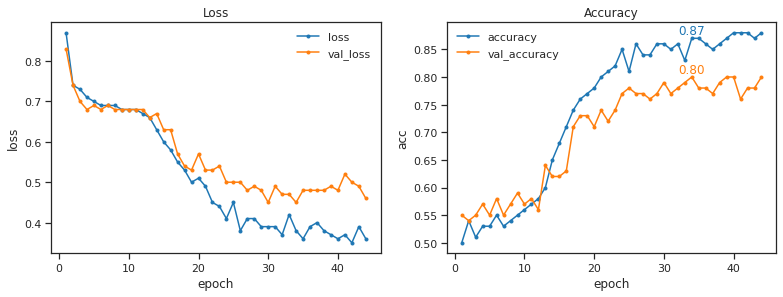

In [27]:
plot_history(history, 
             horizontal=2, 
             vertical_train=-0.008, vertical_val=-0.007)
# epoch 34

In [28]:
f.plot_metrics(model, X_test, y_test)

Acc: 0.8
Precision: 0.8
Recall: 0.75
F1: 0.77
Conf. Matrix: 
[[284  52]
 [ 69 208]]


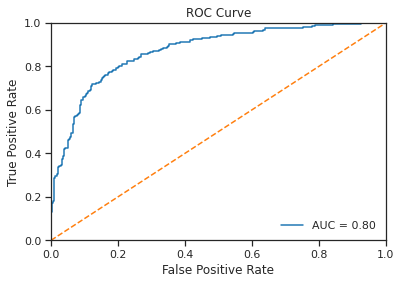

AUC: 0.7981


In [29]:
f.get_roc_curve(model, X_test, y_test)

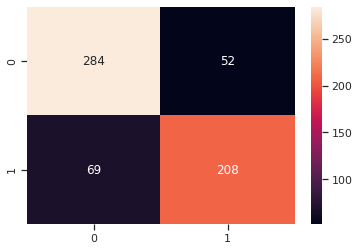

In [30]:
f.plot_confusion_matrix(model, X_test, y_test)